In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 300)

from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SequentialFeatureSelector

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import numpy as np
import pandas as pd
import sklearn.ensemble
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
base_ordinal = pd.read_csv('../Data/BaseOrdinal.csv')
base_ordinal.shape

(2580, 83)

In [3]:
xgb = XGBRegressor()

In [4]:
X = base_ordinal.drop(['SalePrice'], axis=1).values
y = base_ordinal.SalePrice.values

In [5]:
xgb.fit(X,y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [6]:
xgb.score(X,y)

0.9986916564520045

In [7]:
X_cols = base_ordinal.drop(['SalePrice'], axis=1).columns
sorted_importance = sorted(zip(X_cols, xgb.feature_importances_), key=lambda t:t[1], reverse=True)
sorted_importance

[('OverallQual', 0.6113876),
 ('GarageCars', 0.05972298),
 ('GrLivArea', 0.05133951),
 ('CentralAir', 0.028709799),
 ('TotalBsmtSF', 0.027240546),
 ('BsmtQual', 0.016487366),
 ('1stFlrSF', 0.014890318),
 ('BsmtFinSF1', 0.013533816),
 ('YearBuilt', 0.011999053),
 ('ExterQual', 0.011280087),
 ('Fireplaces', 0.011214813),
 ('GarageType', 0.010065013),
 ('GarageArea', 0.009732357),
 ('LandContour', 0.007917272),
 ('BsmtFinType1', 0.0069311718),
 ('BsmtCond', 0.006316797),
 ('HalfBath', 0.0055111824),
 ('SaleCondition', 0.005242437),
 ('MSZoning', 0.005061879),
 ('YearRemodAdd', 0.0048684026),
 ('KitchenQual', 0.0045760414),
 ('MasVnrArea', 0.0040832823),
 ('ScreenPorch', 0.0040660114),
 ('BldgType', 0.0040459936),
 ('PavedDrive', 0.0039911014),
 ('BedroomAbvGr', 0.0036779647),
 ('LotArea', 0.0035938362),
 ('OverallCond', 0.003297503),
 ('BsmtFullBath', 0.0032570872),
 ('2ndFlrSF', 0.0031346108),
 ('RoofMatl', 0.0024249286),
 ('Condition1', 0.002177908),
 ('Neighborhood', 0.002057249),
 ('F

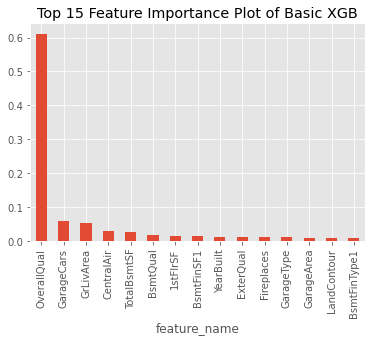

In [8]:
a, b = zip(*sorted_importance[0:15]) # this splits the list of tuples into two lists
pd.DataFrame({'feature_name':a, 'importance_score':b}).plot.bar(x='feature_name',y='importance_score', legend=None)
plt.title('Top 15 Feature Importance Plot of Basic XGB');

## No Scaling.....vs ##

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [10]:
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [11]:
xgb.score(X_train, y_train)

0.9995143407777297

In [12]:
xgb.score(X_test, y_test)

0.900531361105303

In [13]:
X_cols = base_ordinal.drop(['SalePrice'], axis=1).columns
sorted_importance = sorted(zip(X_cols, xgb.feature_importances_), key=lambda t:t[1], reverse=True)
sorted_importance

[('OverallQual', 0.6325754),
 ('GarageCars', 0.07582347),
 ('GrLivArea', 0.05935529),
 ('1stFlrSF', 0.033530455),
 ('Fireplaces', 0.014717979),
 ('GarageArea', 0.014350104),
 ('BsmtFinSF1', 0.013982688),
 ('TotalBsmtSF', 0.011644503),
 ('GarageCond', 0.0099181095),
 ('ExterQual', 0.009469479),
 ('SaleCondition', 0.009085038),
 ('CentralAir', 0.0084384605),
 ('MSZoning', 0.007201201),
 ('YearRemodAdd', 0.0069472026),
 ('Alley', 0.00595792),
 ('YearBuilt', 0.0059261653),
 ('LotArea', 0.005434871),
 ('2ndFlrSF', 0.00529685),
 ('OverallCond', 0.0049463543),
 ('LandContour', 0.0034880207),
 ('BsmtQual', 0.0031896231),
 ('KitchenQual', 0.0029658782),
 ('Functional', 0.0029090121),
 ('BsmtFinType1', 0.0026948105),
 ('LandSlope', 0.0023607833),
 ('MasVnrArea', 0.0022080352),
 ('Neighborhood', 0.002145967),
 ('HeatingQC', 0.0021405236),
 ('BsmtFullBath', 0.0018860504),
 ('EnclosedPorch', 0.0018127072),
 ('Condition1', 0.0017628602),
 ('GarageYrBlt', 0.0017476224),
 ('BsmtCond', 0.0015740786),
 

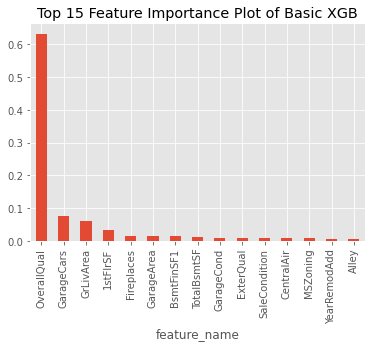

In [14]:
a, b = zip(*sorted_importance[0:15]) # this splits the list of tuples into two lists
pd.DataFrame({'feature_name':a, 'importance_score':b}).plot.bar(x='feature_name',y='importance_score', legend=None)
plt.title('Top 15 Feature Importance Plot of Basic XGB');

In [15]:
predicted_value = xgb.predict(X_test)
true_value = y_test

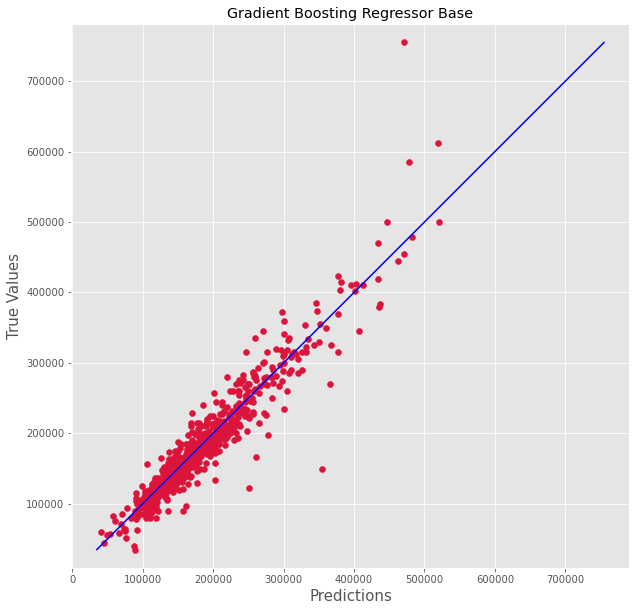

In [16]:
plt.figure(figsize=(10,10))
plt.scatter(predicted_value, true_value, c='crimson')
#plt.yscale('log')
#plt.xscale('log')

plt.title('Gradient Boosting Regressor Base')
p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Predictions', fontsize=15)
plt.ylabel('True Values', fontsize=15)
plt.axis('equal')
plt.show()

## Scaling.... ##

In [17]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [19]:
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [20]:
xgb.score(X_train, y_train)

0.9994964078730713

In [21]:
xgb.score(X_test, y_test)

0.8768410345893902

In [22]:
X_cols = base_ordinal.drop(['SalePrice'], axis=1).columns
sorted_importance = sorted(zip(X_cols, xgb.feature_importances_), key=lambda t:t[1], reverse=True)
sorted_importance

[('OverallQual', 0.6290965),
 ('FullBath', 0.066130325),
 ('GrLivArea', 0.040381726),
 ('GarageCars', 0.025643077),
 ('Fireplaces', 0.02525778),
 ('GarageType', 0.02022188),
 ('TotalBsmtSF', 0.016778057),
 ('BsmtQual', 0.01535011),
 ('KitchenAbvGr', 0.013920328),
 ('GarageArea', 0.012721843),
 ('1stFlrSF', 0.009893144),
 ('BsmtFinSF1', 0.009171245),
 ('ExterQual', 0.008531519),
 ('CentralAir', 0.0074716806),
 ('BldgType', 0.0069473796),
 ('KitchenQual', 0.0064697736),
 ('MasVnrArea', 0.0062762704),
 ('OverallCond', 0.0057605933),
 ('BsmtFullBath', 0.0053462386),
 ('YearRemodAdd', 0.0048150597),
 ('HalfBath', 0.0038744279),
 ('MSZoning', 0.0036708934),
 ('YearBuilt', 0.0033580915),
 ('SaleCondition', 0.002963747),
 ('Functional', 0.0028650064),
 ('GarageCond', 0.0027488254),
 ('SaleType', 0.0025026987),
 ('BedroomAbvGr', 0.0022562842),
 ('LotArea', 0.0020918183),
 ('2ndFlrSF', 0.0020527653),
 ('BsmtFinType1', 0.0020324546),
 ('BsmtExposure', 0.001989493),
 ('RoofMatl', 0.001727339),
 ('

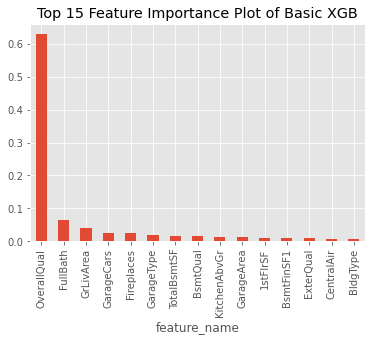

In [23]:
a, b = zip(*sorted_importance[0:15]) # this splits the list of tuples into two lists
pd.DataFrame({'feature_name':a, 'importance_score':b}).plot.bar(x='feature_name',y='importance_score', legend=None)
plt.title('Top 15 Feature Importance Plot of Basic XGB');

In [24]:
predicted_value = xgb.predict(X_test)

In [25]:
true_value = y_test

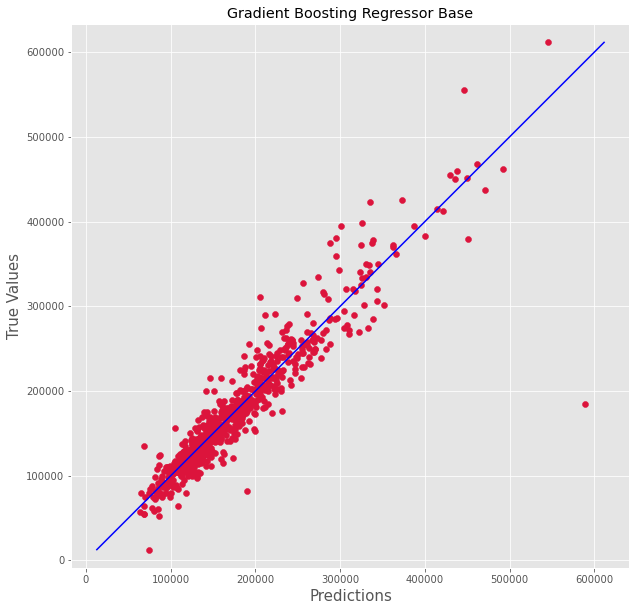

In [26]:
plt.figure(figsize=(10,10))
plt.scatter(predicted_value, true_value, c='crimson')
#plt.yscale('log')
#plt.xscale('log')

plt.title('Gradient Boosting Regressor Base')
p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Predictions', fontsize=15)
plt.ylabel('True Values', fontsize=15)
plt.axis('equal')
plt.show()